In [7]:
! pip install cianparser --force-reinstall
# Обязательно петрезапустить ядро

In [ ]:
# Загрузка данных с сайта Циан
import cianparser

moscow_parser = cianparser.CianParser(location="Москва")
data = moscow_parser.get_flats(deal_type="sale", rooms=(1, 2), with_saving_csv=True, additional_settings={"start_page":1, "end_page":50})
print(data[0])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [3]:
# Загрузка локальных данных
my_path = r'C:\Users\11137731\Documents\DS\Python\HW-2'
df = pd.read_csv(f'{my_path}\\cian_flat_sale_1_50_moskva_05_Jul_2024_02_30_59_092383.csv', sep = ';')

# Загрузка данных с сайта Циан
# df = pd.DataFrame(data)

df = df.loc[df['price'] != 0]

# Для проведения анализа будем использовать районы с количеством объявлений (объектов) более 20
df_f = df.groupby('district').count()[['author']]
df_f = df_f.reset_index()
df_f = df_f.loc[df_f['author'] >= 20]
df_t = df.loc[df['district'].isin(df_f['district'])]

In [24]:
"""
6	Басманный	26
23	Даниловский	52
50	Люблино	25
75	Очаково-Матвеевское	25
78	Покровское-Стрешнево	20
80	Пресненский	100
82	Раменки	59
100	Тверской	25
105	Филевский парк	28
107	Хамовники	45
109	Хорошево-Мневники	69
110	Хорошевский	36
121	Якиманка	25
"""

'\n6\tБасманный\t26\n23\tДаниловский\t52\n50\tЛюблино\t25\n75\tОчаково-Матвеевское\t25\n78\tПокровское-Стрешнево\t20\n80\tПресненский\t100\n82\tРаменки\t59\n100\tТверской\t25\n105\tФилевский парк\t28\n107\tХамовники\t45\n109\tХорошево-Мневники\t69\n110\tХорошевский\t36\n121\tЯкиманка\t25\n'

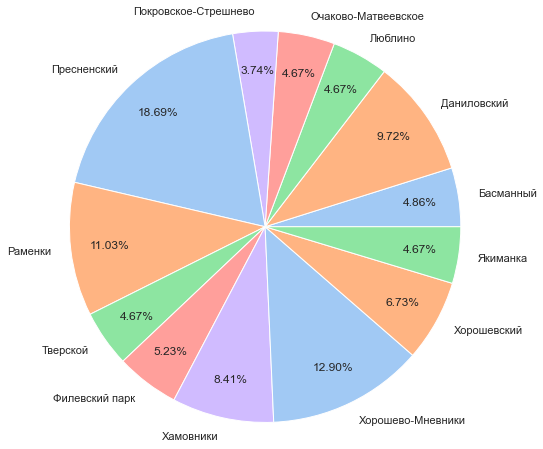

In [23]:
"""
Круговые диаграммы
Данная диаграмма отображает отношение количества предложений по районам.
Наибольшее количество преложений районам Пресенский(18,69%) и  Хрошево-Мневники(12,90%)
"""

rcParams['figure.figsize'] = 6,6

colors = sns.color_palette('pastel')[0:5]
plt.pie(df_f['author'], labels = df_f['district'],
        colors = colors,pctdistance=0.8,
        radius = 1.5, autopct = '%.02f%%')
# plt.set_title('Количество объектов по районам')
plt.show()

In [12]:
df_t = df_t.copy() # Без копирования выдает предупреждение

df_t['price'] = df_t['price']/1000000
# Добавим столбец - цена за  комнату 
df_t['price_room'] = df_t['price']/df_t['rooms_count']
# Добавим столбец - цена за 1 кв.метр
df_t['price_kvm'] = df_t['price']/df_t['total_meters']

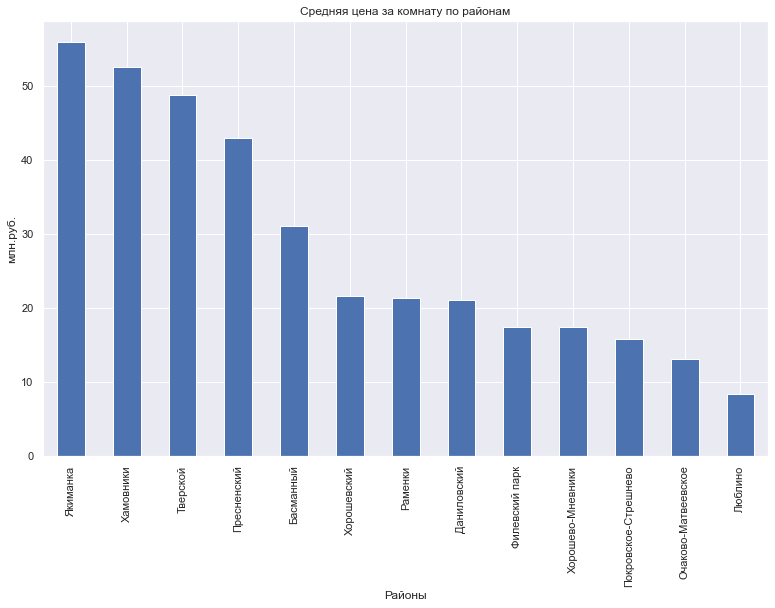

In [22]:
"""
Данная диаграмма отображает среднюю цену за 1 комнату по районам (по убывания).
Максимальная средняя цена(1к) - Якиманка, минимальная цена - Люблино. По объему предложений данные районы имеют минимальное значение(4,67).
"""

df_1 = df_t[['district','price_room']].groupby('district').mean()
df_1 = df_1.reset_index()
df_1['price_room'] = df_1['price_room']
df_1 = df_1.set_index('district')['price_room']

rcParams['figure.figsize'] = 13,8
df_1.sort_values(ascending = False).plot(kind='bar',
                                        title = 'Средняя цена за комнату по районам',
                                        ylabel = 'млн.руб.',
                                        xlabel = 'Районы')
plt.show()

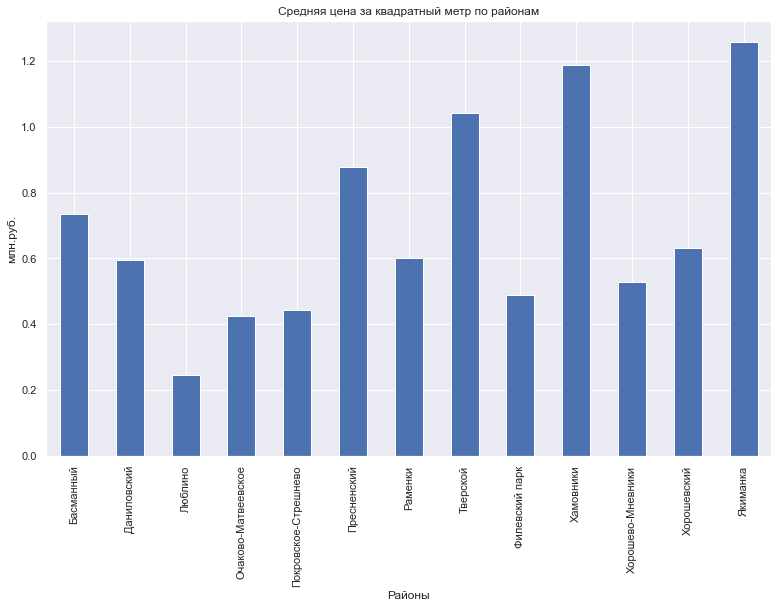

In [21]:
"""
Данная диаграмма отображает среднюю цену за 1 кв.метр по районам (без сортировки).
Максимальная средняя цена (1кв.м) - Якиманка, минимальная цена - Люблино. По объему предложений данные районы имеют минимальное значение.
"""

df_2 = df_t[['district','price_kvm']].groupby('district').mean()
df_2 = df_2.reset_index()
df_2['price_kvm'] = df_2['price_kvm']
df_2 = df_2.set_index('district')['price_kvm']

rcParams['figure.figsize'] = 13,8
df_2.plot(kind='bar',
          title = 'Средняя цена за квадратный метр по районам',
          ylabel = 'млн.руб.',
          xlabel = 'Районы')
plt.show()

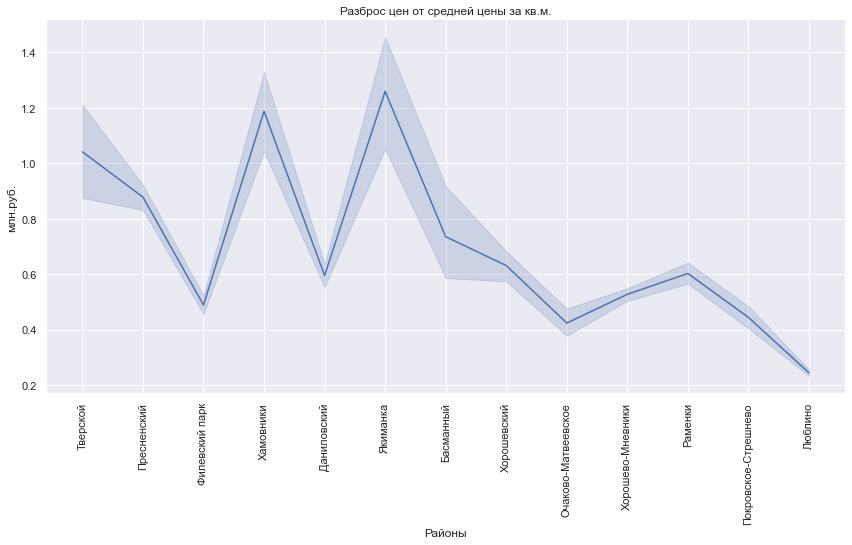

In [20]:
"""
Данная диаграмма отображает разброс цены относительно средней цены за 1 комннату по районам.
Наибольший разброс цен в районах с максималным ценами.
У Пресенского района цена выше средней но разброс цен минимальный из районном с максимальными средними ценами.
"""

sns.relplot(x = 'district',
            y = df_t['price_kvm'],
            data = df_t,
            kind = 'line',
            height = 6,
            aspect = 2
            )
plt.title('Разброс цен от средней цены за кв.м.')
plt.xticks(rotation = 90)
plt.ylabel('млн.руб.')
plt.xlabel('Районы')
plt.show()

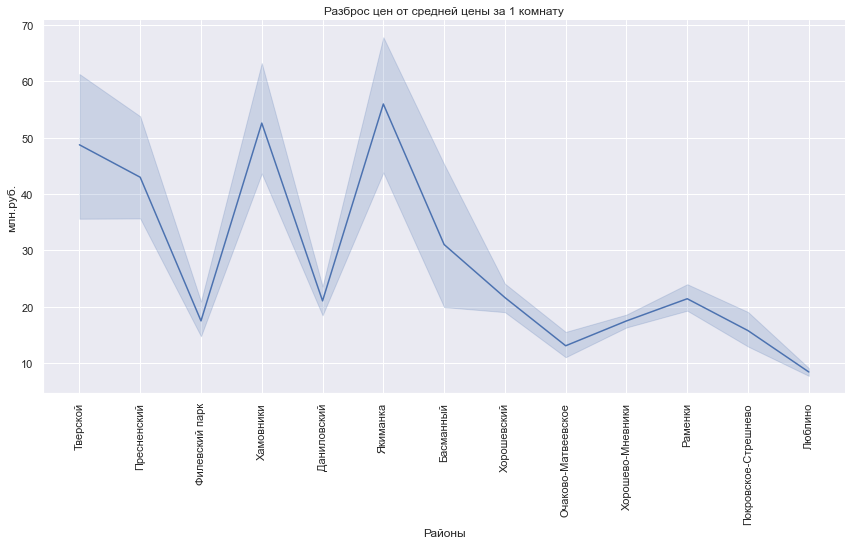

In [19]:
"""
Данная диаграмма отображает разброс цены относительно средней цены за 1 кв.метр по районам.
Наибольший разброс цен в районах с максималными средними ценами.
У Басманного района цена ниже средней, но разброс цен максимальный из районов с минимальными средними ценами.
"""
sns.relplot(x = 'district',
            y = df_t['price_room'],
            data = df_t,
            kind = 'line',
            height = 6,
            aspect = 2
            )
plt.title('Разброс цен от средней цены за 1 комнату')
plt.ylabel('млн.руб.')
plt.xlabel('Районы')
plt.xticks(rotation = 90)
plt.show()

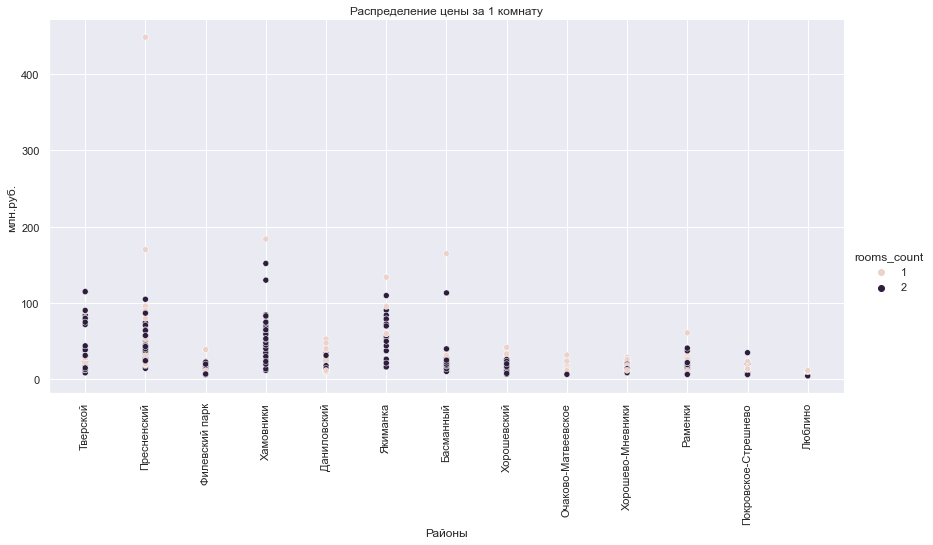

In [17]:
"""
Данная диаграмма отображает распределение цен 1 комнату по районам.
Преимущественно цена за 1 комнату распределена в районе 90 - 100 млн.руб.
"""

sns.set(rc = {'figure.figsize':(10,6)})
sns.relplot(x = 'district',
            y = 'price_room',
            hue = 'rooms_count',
            data = df_t,
            kind = 'scatter',
            height = 6,
            aspect = 2
            )
plt.title('Распределение цены за 1 комнату')
plt.ylabel('млн.руб.')
plt.xlabel('Районы')
plt.xticks(rotation = 90)
plt.show()

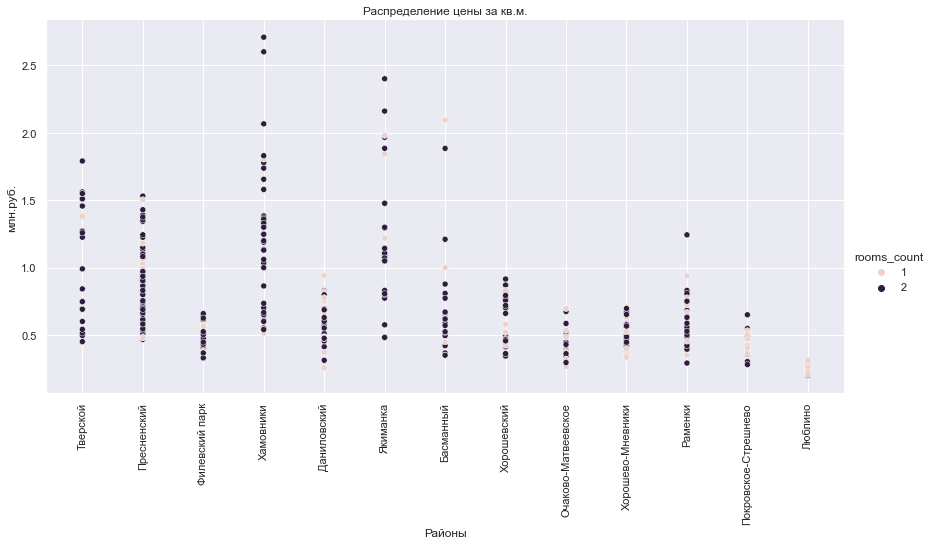

In [18]:
"""
Данная диаграмма отображает распределение цен 1 кв.м по районам.
Преимущественно цена за 1 кв.м в районе  100 млн.руб.
"""
sns.relplot(x = 'district',
            y = 'price_kvm',
            hue = 'rooms_count',
            data = df_t,
            kind = 'scatter',
            height = 6,
            aspect = 2
            )
plt.title('Распределение цены за кв.м.')
plt.xticks(rotation = 90)
plt.ylabel('млн.руб.')
plt.xlabel('Районы')
plt.show()

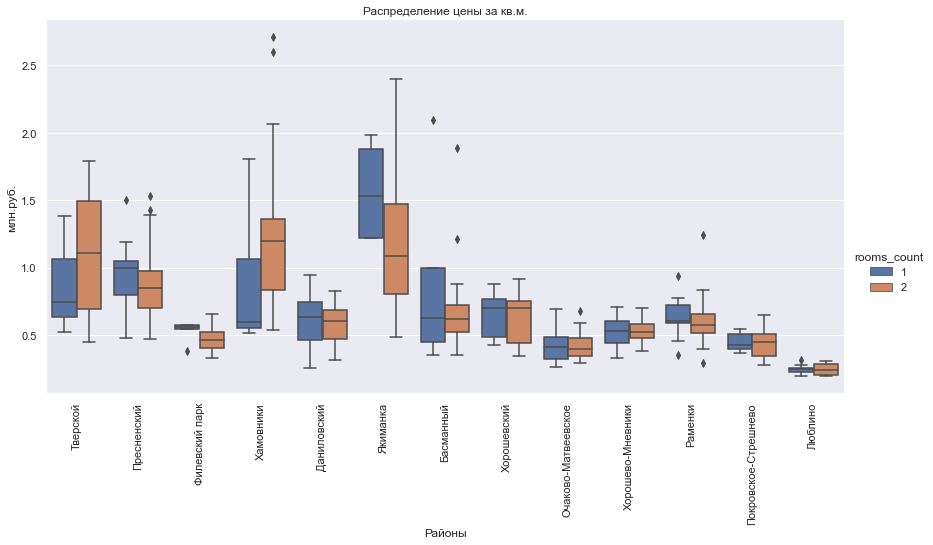

In [16]:
sns.catplot(x = 'district',
            y = 'price_kvm',
            hue = 'rooms_count',
            data = df_t,
            kind = 'box',
            height = 6,
            aspect = 2
            )
plt.title('Распределение цены за кв.м.')
plt.xticks(rotation = 90)
plt.ylabel('млн.руб.')
plt.xlabel('Районы')
plt.show()

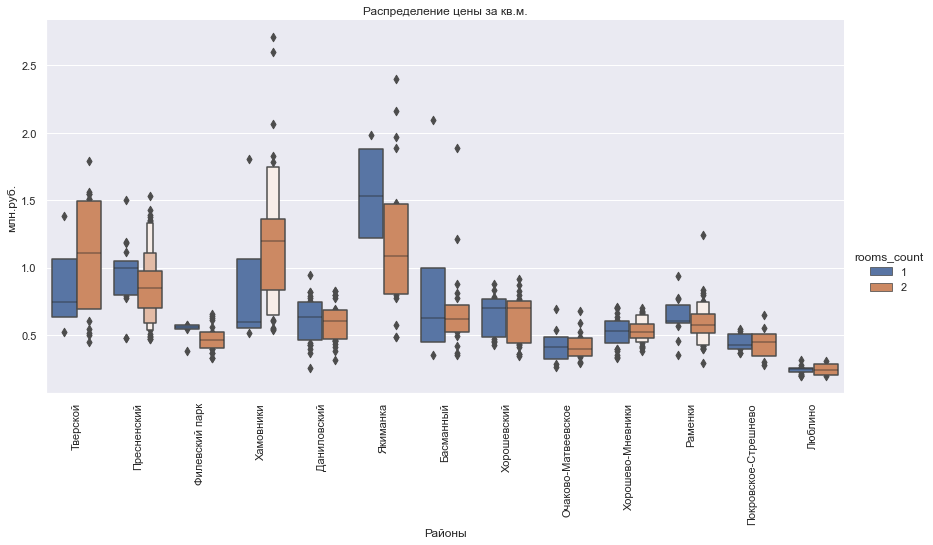

In [187]:
sns.catplot(x = 'district',
            y = 'price_kvm',
            hue = 'rooms_count',
            data = df_t,
            kind = 'boxen',
            height = 6,
            aspect = 2
            )
plt.title('Распределение цены за кв.м.')
plt.xticks(rotation = 90)
plt.ylabel('млн.руб.')
plt.xlabel('Районы')
plt.show()

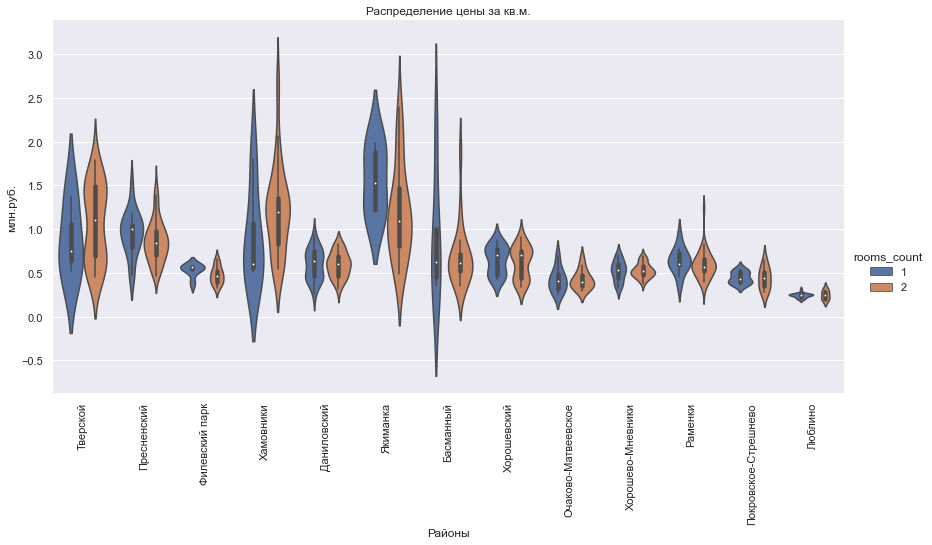

In [188]:
"""
Данная диаграмма отображает распределение цен 1 кв.м по районам и показывает количество значений относительено среднего.
Длинные скрипки показывают максимальный заброс цен, а короткие наоборот минимальный разрос цен.
"""
sns.catplot(x = 'district',
            y = 'price_kvm',
            hue = 'rooms_count',
            data = df_t,
            kind = 'violin',
#             split=True,
#             inner="stick",
#             palette="pastel",
            height = 6,
            aspect = 2,
            )
plt.title('Распределение цены за кв.м.')
plt.xticks(rotation = 90)
plt.ylabel('млн.руб.')
plt.xlabel('Районы')
plt.show()

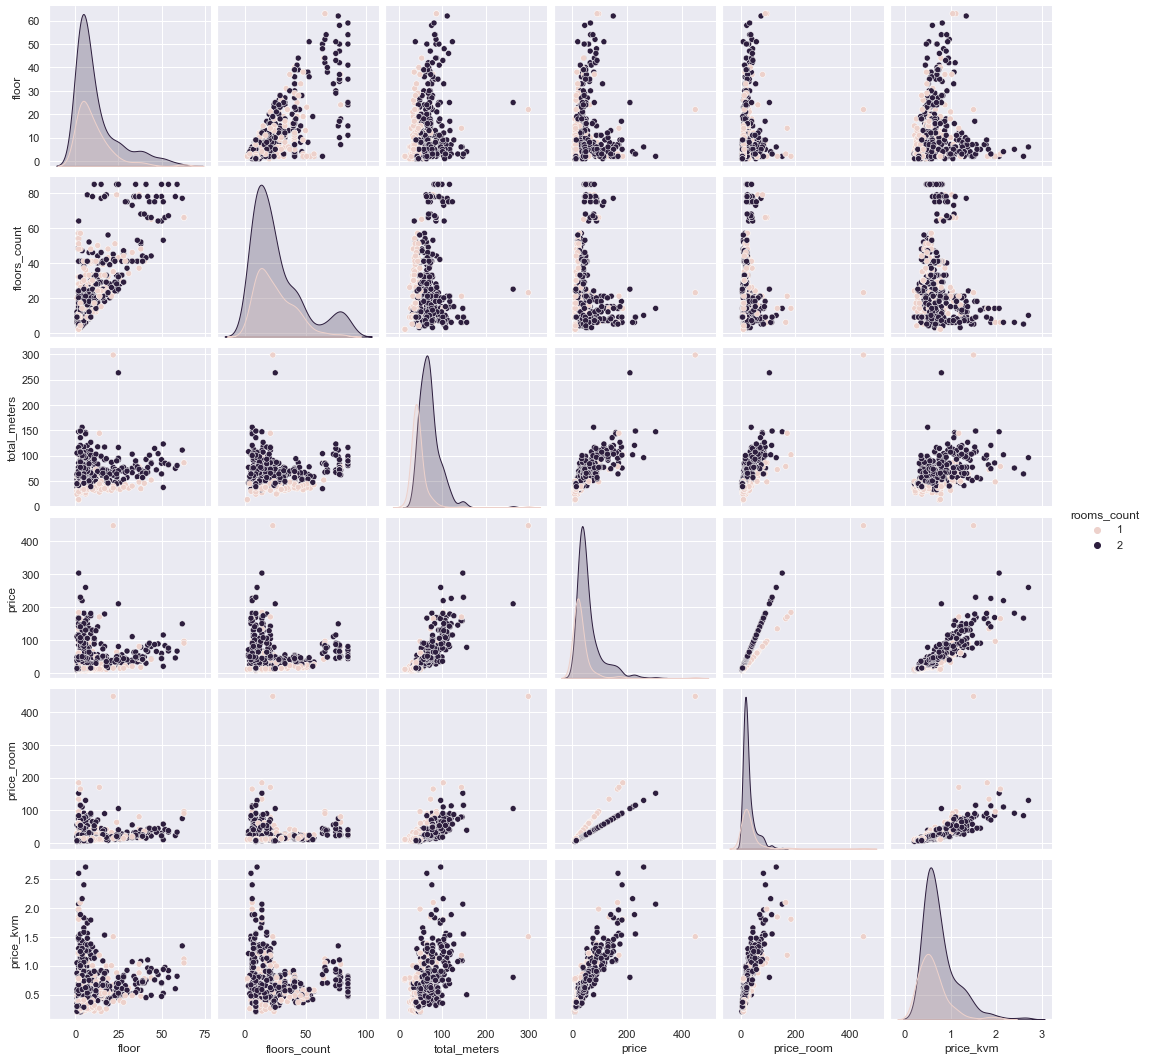

In [111]:
"""
Данная диаграмма отображает рассеяния и зависимости значений выборки.
"""
sns.pairplot(df_t, hue = 'rooms_count')
plt.show()

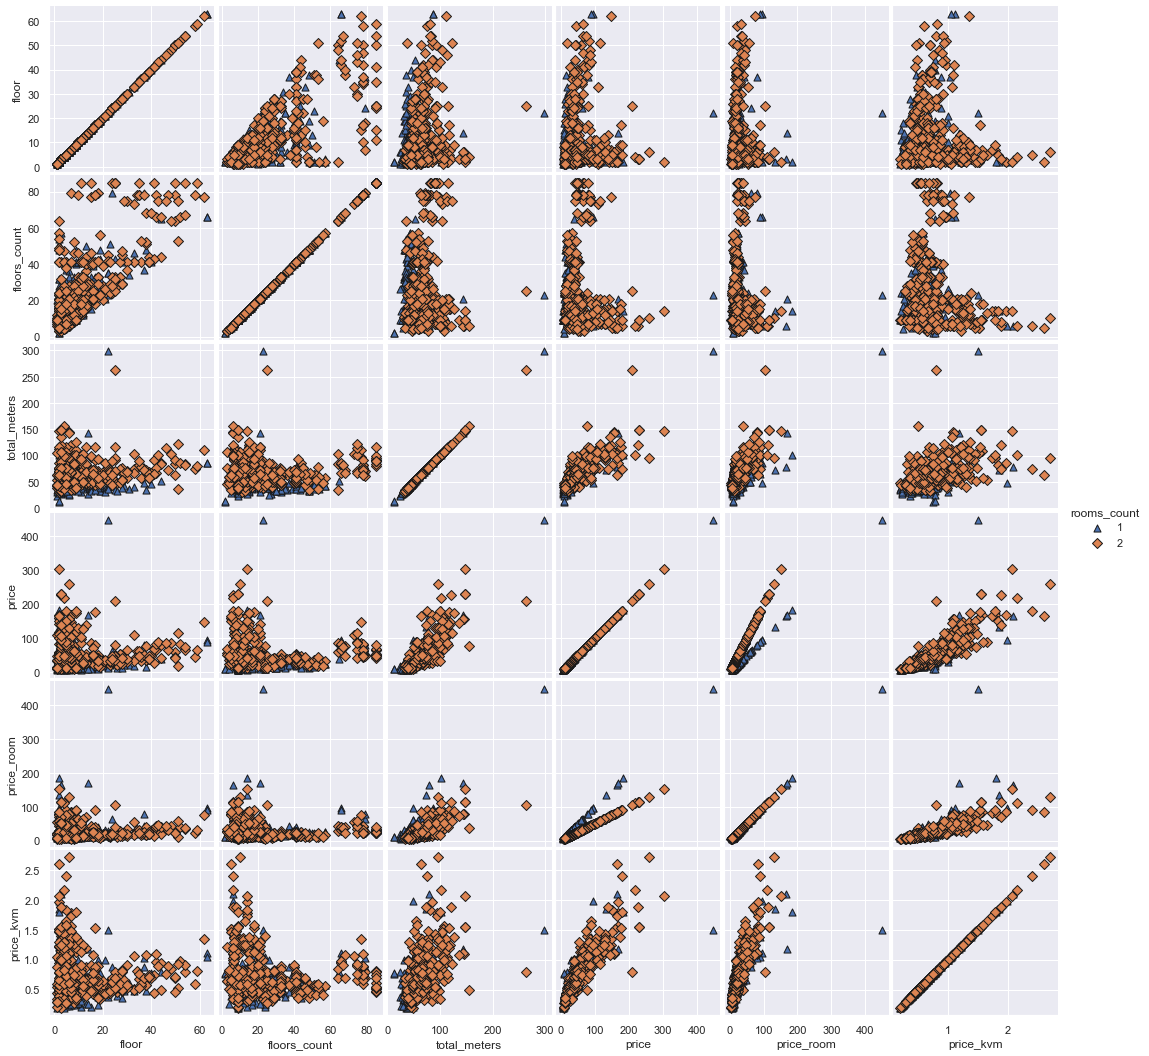

In [157]:
"""
Данная диаграмма отображает рассеяния и зависимости значений выборки.
"""
g = sns.PairGrid(df_t,
                 hue ='rooms_count',
                 hue_kws = {"marker": ["^", "D"]},
#                  palette = {1:'blue', 2:'yellow'}
                 )
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

In [26]:
# Подготовим данные в сводной таблицы по квартирам в строчку и по ценам в колонках
price_n = pd.DataFrame(df_t.groupby(['district', "rooms_count"]).price.mean())
price_n = price_n.reset_index()
price_n = price_n.pivot(index='rooms_count',columns=['district'], values='price')
price_n

district,Басманный,Даниловский,Люблино,Очаково-Матвеевское,Покровское-Стрешнево,Пресненский,Раменки,Тверской,Филевский парк,Хамовники,Хорошево-Мневники,Хорошевский,Якиманка
rooms_count,,,,,,,,,,,,,
1,52.252480,24.383440,8.93768,17.016334,16.690175,83.546833,29.356623,45.666667,26.699492,59.634127,20.129109,26.247516,87.366000
2,50.870155,35.779835,10.89250,20.951698,28.782821,69.328466,38.272021,98.320364,29.866442,103.435502,31.543426,37.278458,100.025043


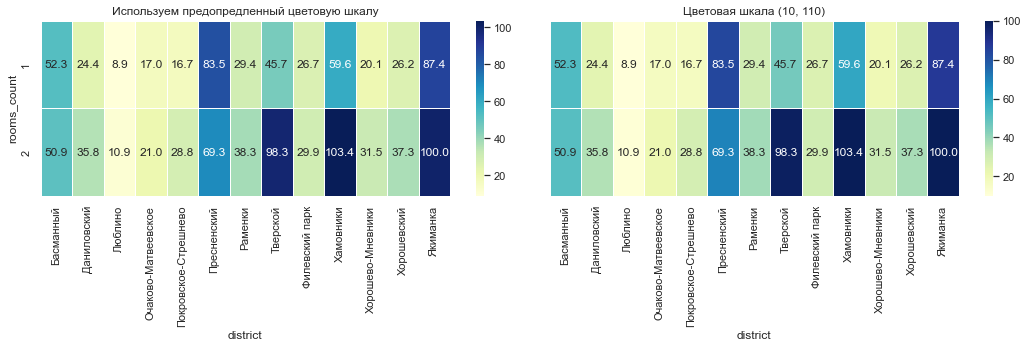

In [30]:
"""
Данная диаграмма средние цены в млн.руб за 1к 2к квртиры по районам.
По двум районам (Басманный, Пресненский) ср.цена 2к квартиры ниже ср.цены 1к квартиры.
"""
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

sns.heatmap(
    price_n,
    annot = True,
    fmt = '.01f',
    linewidths = .5,
    cmap = "YlGnBu",
    ax = ax1)
ax1.set_title('Используем предопредленный цветовую шкалу')

sns.heatmap(
    price_n,
    annot = True,
    fmt = '.01f',
    linewidths = .5,
    robust = True,
    vmin = 10,
    vmax = 100,
    cmap = "YlGnBu",
    yticklabels = False,
    ax = ax2)
ax2.set(title = 'Цветовая шкала (10, 110)', ylabel = '')

plt.tight_layout()
plt.show();

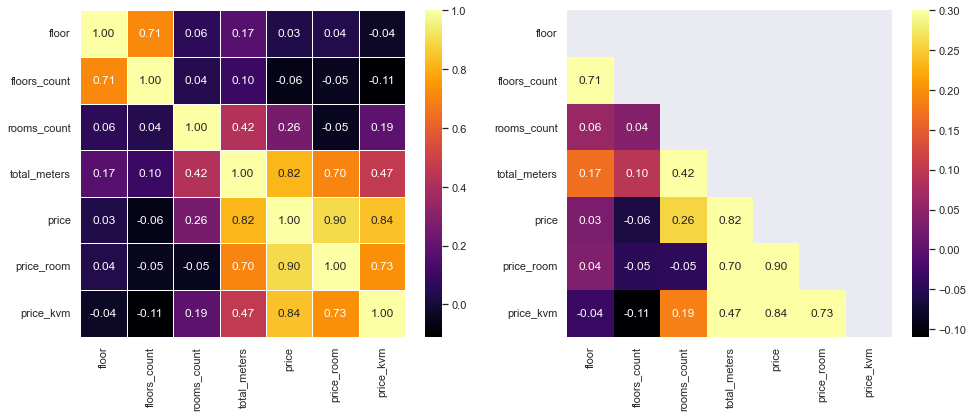

In [153]:
"""
Тепловая карта - показывает степень завсисмости(корреляции) между двумя парами значений.
Например: значение price коррелируется(имеет больший коэффициент корреляции) со значениями price_room, price_kvm и total_meters
"""
corr = df_t.corr()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))

sns.heatmap(corr, annot = True, fmt = '.2f',linewidths = .5, cmap = "inferno", ax = ax1);
mask = np.zeros_like(corr)
np.triu_indices_from(mask)
mask[np.triu_indices_from(mask)] = True
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, vmax = .3, annot = True, fmt = '.2f', cmap = "inferno", ax = ax2)
plt.show();